*****************************************************************
#  The Social Web 
- Instructors: Davide Ceolin.
- TAs: Jacco van Ossenbruggen, Elena Beretta, Mirthe Dankloff.
- Exercises for Hands-on session 1- TAs: Jacco van Ossenbruggen, Elena Beretta, Mirthe Dankloff.
*****************************************************************

Prerequisites:
- Python 3.8
- Python packages: twitter, prettytable, matplotlib

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Twitter. 

But let's check first if we're running a sufficiently new version of Python:

In [75]:
import platform
import sys
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6)

This jupyter notebook is running on Python 3.8.5


Let's install now the required packages for this hands on session:

In [76]:
# If you're using a virtualenv, make sure its activated before running 
# this cell!
!pip install python-twitter-v2 PrettyTable matplotlib geocoder tweepy

You should consider upgrading via the 'C:\IW\python\projects\.virtualevns\soweb\Scripts\python.exe -m pip install --upgrade pip' command.


## Part 1: Authorizing an application to access Twitter account data:

1. Make sure to add your mobile phone number to your private twitter profile.
2. Go to https://developer.twitter.com/en/portal/dashboard and click on "create an app". Twitter will prompt you to create a *developer account*.
3. You'll receive an *account confirmation* email with a link. Follow it and create an app. 
4. Once the app is created, you'll see a "Keys and Token" item on the top right tab of the webpage. These values will be needed to fill in the next cell.
5. Please delete all your keys before submission.

NOTE: This notebook is based on the API functionalities "Essential" license. Check the "Academic Research" license (right menu, "Twitter API v2", "Academic Research") if you need a broader set of functionalities.

In this notebook, you can use the official Twitter V2 API:

In [77]:
from pytwitter import Api 

TWITTER_API_KEY = "kiykuL1dcrZaDBu87AJ6B6qYJ"
TWITTER_API_SECRET = "e2jVRp2NYUASVnzPMoDlqSF1mCXg2sn2Wk5ji5m7wxaRwEa8B5"
# to get the oauth credential you need to click on the 'Generate access token' button:
TWITTER_ACCESS_TOKEN = "342328729-r299Soto2ws05aoFJGf5VF5W5WjuT9kiOexMQkIg"
TWITTER_ACCESS_SECRET = "pPiRurJ0Qafakv6eukLh2RdFpyE8q0v1UpQVMPOLbrFjy"

api = Api(
        consumer_key=TWITTER_API_KEY,
        consumer_secret=TWITTER_API_SECRET,
        access_token=TWITTER_ACCESS_TOKEN,
        access_secret=TWITTER_ACCESS_SECRET
    )


or the Tweepy API:

In [78]:
import tweepy

auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)

twapi = tweepy.API(auth)

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAANsrjAEAAAAA2khjQ8naqwRDv71DnABFiWMFVt4%3DQUdWxiq7UoeqxvvqQHwZOpvL7sEM3rXusB0cs5dTV7MipoYlrH")

### 1.1: Retrieving twitter search trends [Only with Academic Research License]

In [79]:
# import geocoder

# loc = "Amsterdam"

# g = geocoder.osm(loc)
# closest_loc = twapi.closest_trends(g.lat, g.lng)
# trends = twapi.get_place_trends(closest_loc[0]["woeid"])

# print(trends[0]["trends"])


### Task 1 [Only with Academic Research License]
Twitter uses WOEIDs. Find out how WORLD_WOE_IDs were originally defined by Yahoo! and try to use others in a query. What kind of differences do you find between the worldwide trends and the local trends? 


In [80]:
# Your code here
#
#
#
#
#

### 1.2: Retrieving recent Tweets [Any license]

In [81]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

q = '#qatar2022' # XXX: Set this variable to a trending topic, or anything else you like. 
search_results = api.search_tweets(q)

# The following code allows you to print in a nice format the contents of search_results
pprint.pprint(search_results, depth=1, width=60)

Response(data=[Tweet(id=1592183795218014208, text=RT @AlthaniSuhaim: اللهم حقق احلامه ومكنه من...), Tweet(id=1592183792508502016, text=RT @fifaworldcup_es: 🎙️ Señores pasajeros,...), Tweet(id=1592183787516993536, text=لقطات رياضية تابعو حسابي الاساسي @al_muhander...), Tweet(id=1592183782475431939, text=RT @la12tuittera: 6️⃣ días para #Qatar2022 🇦🇷...), Tweet(id=1592183782064689153, text=RT @FutboolFichajes: Así van llegando las...), Tweet(id=1592183776859258880, text=Check out my latest product:...), Tweet(id=1592183776444284931, text=#Qatar2022 #Deportes_EB #Video Comenzó el...), Tweet(id=1592183769859248128, text=RT @MarkThEwizz: From a boys dream to a man’s...), Tweet(id=1592183766101135360, text=RT @fifaworldcup_es: 🎙️ Señores pasajeros,...), Tweet(id=1592183764402475008, text=Check out my latest product:...)])


### Task 2

In the cell below, create a second variable (e.g. `statuses2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [82]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

q = '#qatar2022' # XXX: Set this variable to a trending topic, or anything else you like. 

# statuses2 = api.search_tweets(q)


# search_results = client.search_all_tweets(q) 
statuses2 = twapi.home_timeline(count=100, include_entities=True)

# The following code allows you to print in a nice format the contents of search_results
# pprint.pprint(search_results, depth=1, width=1)#
# print()

## Part 2: Extracting text, screen names, and hashtags from tweets 

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples from Mining the Social Web:

In [83]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]

# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]

# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\n', 'Web\n')]

# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]

# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x for y in list_of_lists for x in y]

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `status_texts` of type list. \
The list will be filled with the `text` elements from each `status`, whereas `status` comes from looping through all `statuses` in the `search_results` list (1.2). \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [104]:
import json
status_texts = [ search_result.id for search_result in search_results.data ]
# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.

status_texts = [ search_result.text for search_result in search_results.data ]

#hashtags = [ hashtag['text'] for status in statuses \
#        for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w for t in status_texts for w in t.split() ] #split the string on the empty spaces

# Explore the first 5 items for each...
print(json.dumps(status_texts, indent=1))
print(json.dumps(words, indent=1))

[
 "RT @AlthaniSuhaim: \u0627\u0644\u0644\u0647\u0645 \u062d\u0642\u0642 \u0627\u062d\u0644\u0627\u0645\u0647 \u0648\u0645\u0643\u0646\u0647 \u0645\u0646 \u0625\u0647\u062f\u0627\u0641\u0647 \u0648\u0625\u0645\u0646\u064a\u0627\u062a\u0647 \n\n#\u0643\u0623\u0633_\u0627\u0644\u0639\u0627\u0644\u0645_2022 #\u0645\u0631\u062d\u0628\u0627_\u0628\u0627\u0644\u062c\u0645\u064a\u0639_\u0641\u064a_\u062f\u0648\u062d\u0629_\u0627\u0644\u062c\u0645\u064a\u0639 #\u0642\u0637\u0631_\u0645\u062d\u0644\u0648\u0629 #\u0642\u0637\u0631_2022 #Qatar20\u2026",
 "RT @fifaworldcup_es: \ud83c\udf99\ufe0f Se\u00f1ores pasajeros, bienvenidos al vuelo de la FIFA, con destino a #Qatar2022. \u2708\ufe0f \ud83c\udde6\ud83c\uddf7\ud83c\udde7\ud83c\uddf7\ud83c\uddea\ud83c\udde8\ud83c\uddfa\ud83c\uddfe\n\n\u00a1Sudam\u00e9rica est\u00e1 lista p\u2026",
 "\u0644\u0642\u0637\u0627\u062a \u0631\u064a\u0627\u0636\u064a\u0629 \n\u062a\u0627\u0628\u0639\u0648 \u062d\u0633\u0627\u0628\u064a \u0627\u0644\u0627\u0633\u0627\

### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [101]:
usernames = [ status.user.screen_name for status in statuses2 ] 
hashtags = [ hashtag["text"] for status in statuses2 for hashtag in status.entities['hashtags']]
text = [ status.text for status in statuses2 ]
words_ander = [word  for status in statuses2 for word in status.text.split()]
print(usernames)
print(hashtags)
print(text)

['eneko98', 'eldiarioes', 'JRhodesPianist', 'eldiarioes', 'IzquierdaUnida', 'archillect', 'eldiarioes', 'MultiversoTM', '2010MisterChip', 'eldiarioes', 'DigitalTrendsEs', 'Goyojimenez', 'anse_96maniako', 'anse_96maniako', 'eldiarioes', 'anse_96maniako', 'eneko98', 'eldiarioes', 'MultiversoTM', 'archillect', 'canaltcm', 'DayoScript', 'eldiarioes', 'eneko98', 'desdemanhattan', 'alo_oficial', 'eldiarioes', 'quiquepeinado', 'DigitalTrendsEs', 'DigitalTrendsEs', 'elmundotoday', 'eldiarioes', 'yisucrist', 'archillect', 'MagicMundi', 'MultiversoTM', 'eldiarioes', 'DigitalTrendsEs', 'pixitaa_', 'eldiarioes', 'deusto', '2010MisterChip', 'eldiarioes', '2010MisterChip', 'DigitalTrendsEs', 'DigitalTrendsEs', 'DigitalTrendsEs', 'eldiarioes', 'VancityReynolds', 'eldiarioes', 'eldiarioes', 'archillect', 'canaltcm', 'LaResistencia', 'levmauc', 'eldiarioes', 'DigitalTrendsEs', 'IzquierdaUnida', 'eldiarioes', 'IzquierdaUnida', 'IzquierdaUnida', 'IzquierdaUnida', 'IzquierdaUnida', 'IzquierdaUnida', 'eldi

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [102]:
from collections import Counter

for item in [words_ander]:
    c = Counter(item)
    
print(c.most_common()[:10]) # top 10

[('de', 74), ('la', 52), ('en', 41), ('a', 33), ('que', 32), ('y', 25), ('el', 24), ('RT', 21), ('del', 19), ('las', 17)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [87]:
c = Counter(hashtags)
    
print(c.most_common()[:10]) # top 10

[('MadridSeLevantaEl13', 1), ('HUMOR', 1), ('Iraq', 1), ('ElonMusk', 1), ('SpaceX', 1), ('TheMandalorian', 1), ('SemanaDeustoEmprende2022', 1), ('Luna', 1), ('Photoshop', 1), ('gratis', 1)]


### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [88]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(words, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [89]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['RT', '@AlthaniSuhaim:', 'اللهم', 'حقق', 'احلامه', 'ومكنه', 'من', 'إهدافه', 'وإمنياته', '#كأس_العالم_2022', '#مرحبا_بالجميع_في_دوحة_الجميع', '#قطر_محلوة', '#قطر_2022', '#Qatar20…', 'RT', '@fifaworldcup_es:', '🎙️', 'Señores', 'pasajeros,', 'bienvenidos', 'al', 'vuelo', 'de', 'la', 'FIFA,', 'con', 'destino', 'a', '#Qatar2022.', '✈️', '🇦🇷🇧🇷🇪🇨🇺🇾', '¡Sudamérica', 'está', 'lista', 'p…', 'لقطات', 'رياضية', 'تابعو', 'حسابي', 'الاساسي', '@al_muhander', '#Qatar2022', '#أرشيف_المهندر', 'https://t.co/gwQFU1S0T8', 'RT', '@la12tuittera:', '6️⃣', 'días', 'para', '#Qatar2022', '🇦🇷', 'https://t.co/MuQLF97V7v', 'RT', '@FutboolFichajes:', 'Así', 'van', 'llegando', 'las', 'selecciones', 'a', '#Qatar2022', '🏆🇶🇦', '📹:', '@brfootball', 'https://t.co/8hhTJr3aqM', 'Check', 'out', 'my', 'latest', 'product:', 'https://t.co/L0smCLJW00', '#mondaythoughts', '#MondayMotivation', '#PMSIDontWantToOverreactBUT', '#MondayMorning', '#EnchantedToMeetJAKE', '#WWERaw', '#YetToComeInBUSAN', '#GOLDEN', '#ONEPIECE1065', '#bom

### 3.2 Using prettytable to display tuples in a nice way



In [90]:
from prettytable import PrettyTable


pt = PrettyTable(field_names=['Words', 'Count'])
c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:10] ]
pt.align["Words"], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt) 

+-------------------+-------+
| Words             | Count |
+-------------------+-------+
| RT                |     6 |
| #Qatar2022        |     6 |
| a                 |     5 |
| @fifaworldcup_es: |     2 |
| 🎙️                 |     2 |
| Señores           |     2 |
| pasajeros,        |     2 |
| bienvenidos       |     2 |
| al                |     2 |
| vuelo             |     2 |
+-------------------+-------+


### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [112]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in status_texts ])
    
    return 1.0*total_words/len(status_texts) 

# Let's use these functions:



print("Lexical diversity: ", lexical_diversity(words))
print("Average words per tweet: ", average_words(words))

Lexical diversity: %s 0.6763005780346821
Average words per tweet: %s 17.3


### Task 5: What do the printed numbers indicate? Try to explain them.

__Lexical diversity__ describes how many unique words(types) are used in a set of words(tokens), this defines how many word repetitions can be found across a text. A value of 1 indicates that each word is unique and found once. A value closer to 0 indicates a higher rate of word repetition.

__Average words per tweet__ is pretty self-descriptive.

### 3.4 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [92]:
retweets = client.get_retweeters(id=1224140327688249349) # Get the original tweet id for a tweet from its retweeted_status node and insert it here
print("Users who've retweeted the tweet:\n")
print([retweets])

Users who've retweeted the tweet:

[Response(data=[<User id=289180596 name=mattias username=mblandnc>, <User id=1225532665849405448 name=connor username=Connormccoolman>, <User id=1198130211226898432 name="Robert Mueller" username=DarnMilk>, <User id=2382629469 name=Coy Holt username=coy_holt>, <User id=1184868443679526913 name=HarleyBee 🐝 username=QueenHarleyBee>, <User id=54946944 name=Marko ⭐️⭐️⭐️⭐️⭐️⭐️ username=MARKOPOLO100>, <User id=4061282055 name=Samuel Kutzer username=SHAK_08>, <User id=279634273 name=Sebastian username=saabooboo>, <User id=15712221 name=smirnoff ice enjoyer username=notJacksonfish>, <User id=329920551 name=Martinez username=MartinFaced>, <User id=3883486521 name=Haha Lexis username=cestkisa>, <User id=263972455 name=Ernesto Garza username=elchivo72>, <User id=2263463959 name=elon’s musk 🏳️‍🌈 username=abrewer18>, <User id=57758833 name=Smitty Werbenmanjensen username=ChrEEstosK>, <User id=1516575908 name=c🦃rm🎄c username=McCormacSpices>, <User id=77604984458236

### Task 6 (advanced)

If you have a Twitter account with a nontrivial number of tweets, request your historical tweet archive from your account settings and analyze it. \
The export of your account data includes files organized by time period in a convenient JSON format. See the README.txt file included in the downloaded archive for more details. 



What are the most common terms that appear in your tweets? \
Who do you retweet the most often? \
How many of your tweets are retweeted (and why do you think this is the case)?

### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*


In the previous exercises we have been looking at the text from the tweets, but when you retrieved the results, you retrieved much more information about the tweets, such as the username of the person who shared this tweet with the world. 


You can use this information to find out who retweets whom in our examples. 

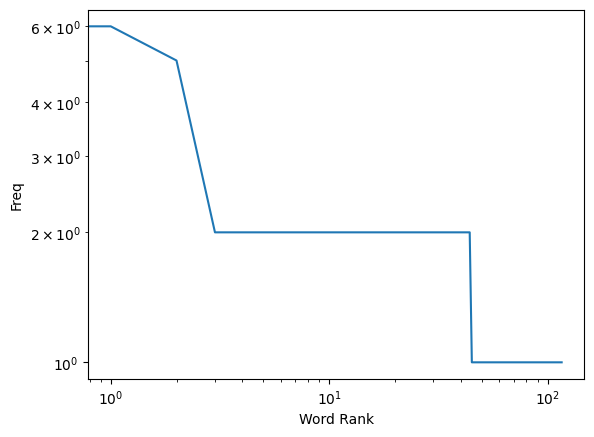

In [93]:
word_counts = sorted(Counter(words).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

<Figure size 640x480 with 0 Axes>

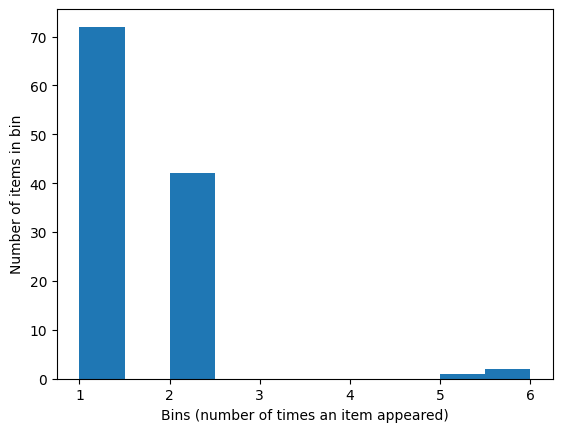

<Figure size 640x480 with 0 Axes>

In [94]:
c = Counter(words)
plt.hist(c.values())
    
plt.title("")
plt.ylabel("Number of items in bin")
plt.xlabel("Bins (number of times an item appeared)")
    
plt.figure()

You should consider upgrading via the 'C:\IW\python\projects\.virtualevns\soweb\Scripts\python.exe -m pip install --upgrade pip' command.
C:\Users\Ander\AppData\Local\Temp\ipykernel_14924\2177435562.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_counts, kde=False, rug=True)


<AxesSubplot: >

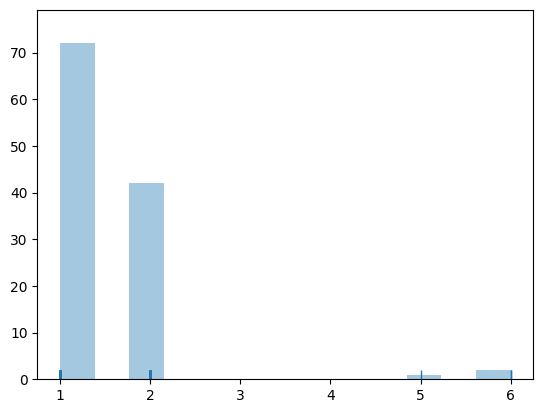

In [95]:
# extra: seaborn plots with a one-liner.
!pip install seaborn
import seaborn as sns

sns.distplot(word_counts, kde=False, rug=True)
